In [4]:
#datos.apply(lambda x: (x.name if x.dtype == np.int64 else ""),axis = 0)


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing
import numpy as np
import random
import pyclustertend 
import plotly.express as px
import seaborn as sb
import sklearn.cluster as cluster
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import DecisionTreeRegressor 
from sklearn import tree
from sklearn import metrics
from sklearn.cluster import KMeans
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier


In [3]:
datos = pd.read_csv("train.csv", encoding='ISO-8859-1')


## Análisis exploratorio de los datos

Primero se puede observar todas las columnas que tiene el dataframe de los datos proporcionados por train.csv.

In [3]:
datos.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Se muestra la cantidad de datos, siendo 81 columnas con 1460 filas.

In [4]:
datos.head

<bound method NDFrame.head of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Util

Se obtiene una estadistica descriptiva de los datos para resumir la medida de tendencia central y la distribucion de los datos. Se puede observar que el precio  mas bajo de casas es de 34900, el precio mas alto de una casa es de 755000, la media es de 190821 y en los percentiles el 25% es de 129975, el 50% es de 163000 y el 75% es de 214000.

In [5]:
datos.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Se determina los tipos de datos que hay siendo 35 de tipo int64, 3 de tipo float64 y 43 de tipo object.

In [6]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Se realiza un mapa de calor para ver la correlacion de las variables y empezar a descartar y seleccionar las de utilidad.

Text(0.5, 1.0, 'Correlacion entre variables')

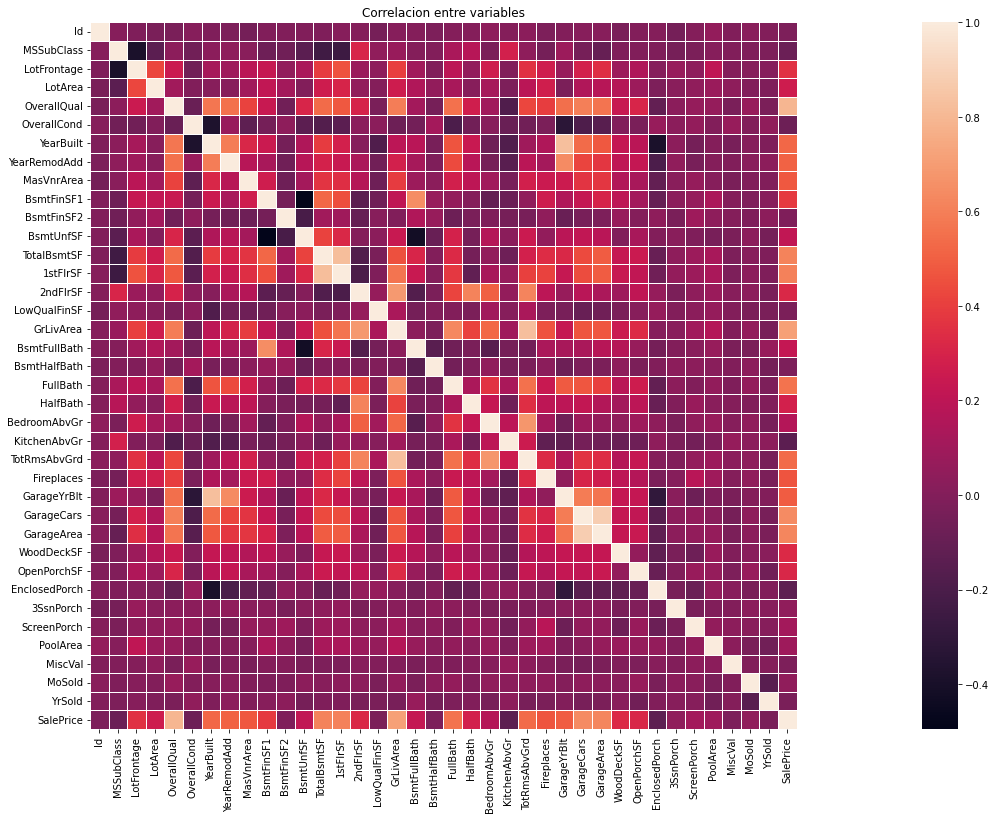

In [7]:
correlacion_datos = datos.corr()
f, ax = plt.subplots(figsize=(45, 13))
sb.heatmap(correlacion_datos, vmax=1,square=True, linewidths=.5)
plt.title("Correlacion entre variables")


Se obtienen las variables de interes que tengan una correlacion mayor a 0.5 con Sale Price, pudiendo notar que YearRemodAdd, solo se correlaciona con SalePrice con una variable de correlacion de 0.51 y no muestra correlacion muy debil con el resto de variables, por lo que se descarta.

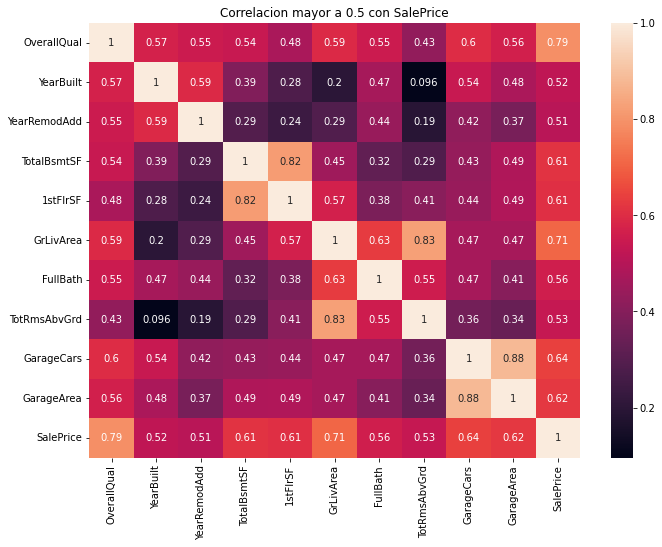

In [8]:
datos_correlacionados = correlacion_datos.index[(correlacion_datos["SalePrice"])>0.5]
plt.figure(figsize = (11,8))
plt.title("Correlacion mayor a 0.5 con SalePrice")
g = sb.heatmap(datos[datos_correlacionados].corr(),annot=True)


Tras analizar las variables en el mapa de calor, se descartan las que no aportan mayor informacion al compararlo con otras variables que no sean SalePrice. Asi mismo se realiza un diagrama de dispersion con dichas variables, notando que la correlacion es positiva y debilmente positiva.

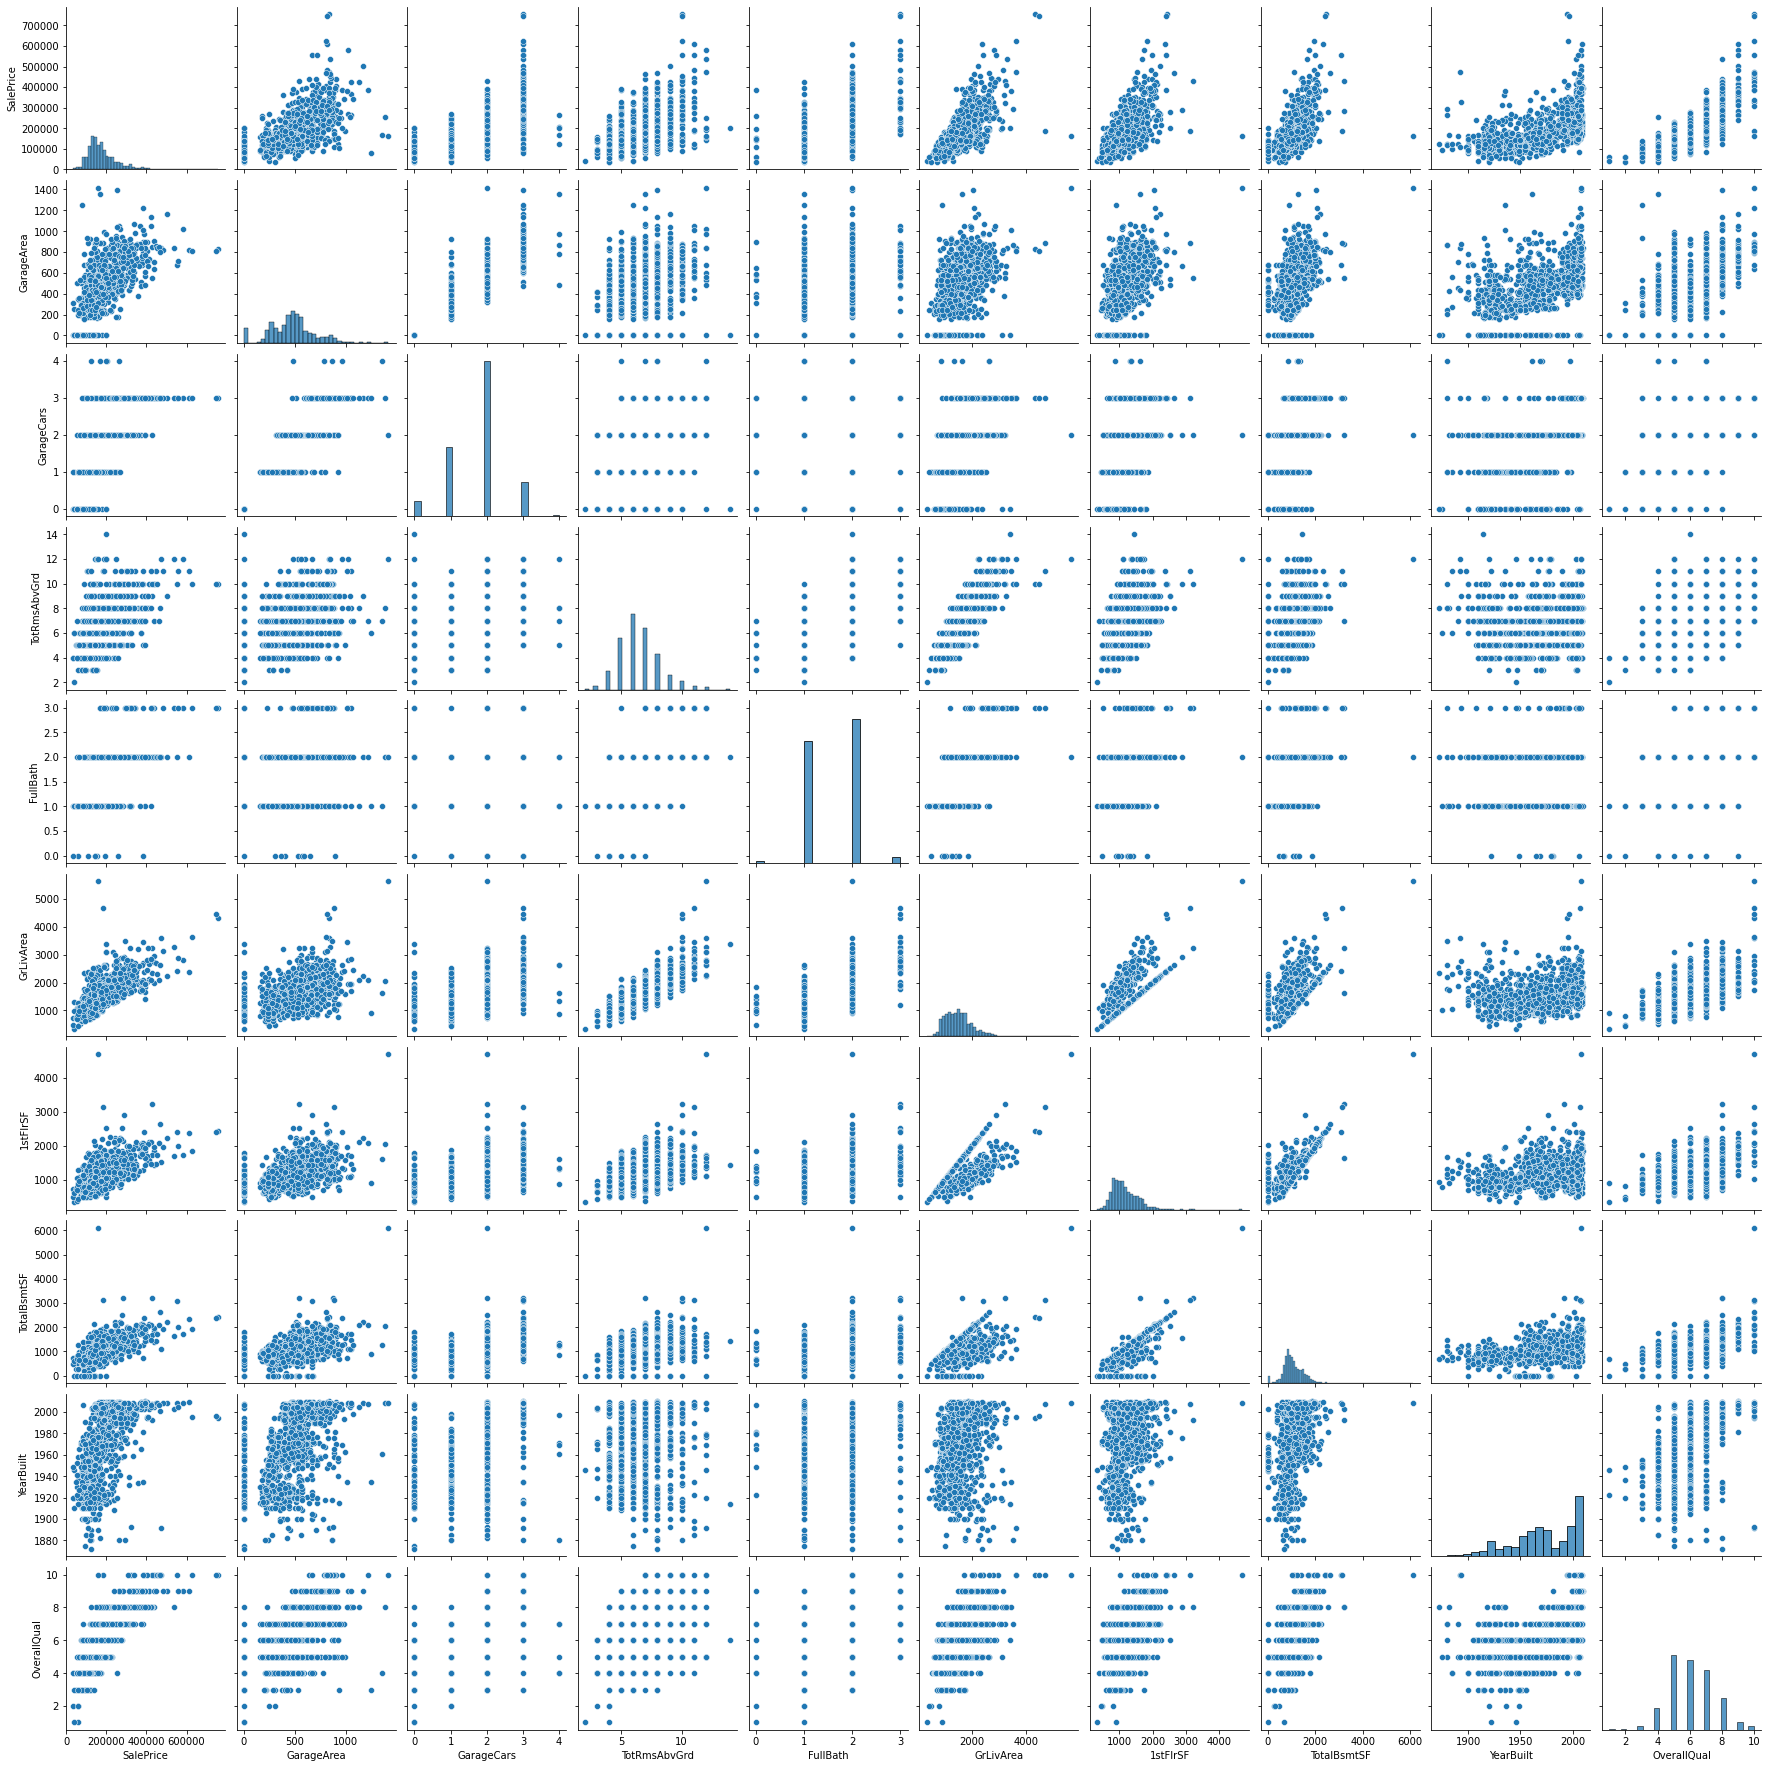

In [9]:
sb.pairplot(datos,vars=["SalePrice","GarageArea","GarageCars","TotRmsAbvGrd","FullBath","GrLivArea","1stFlrSF", "TotalBsmtSF", "YearBuilt", "OverallQual"])



Se probo el Estadístico de Hopkins teniendo una tendencia a 0 con 0.05, por lo que los datos no estan uniformemente distribuidos, por lo que el clustering es de utilidad para observaciones.

In [4]:
random.seed(150)
datos_cluster = datos[["SalePrice","GarageArea","GarageCars","TotRmsAbvGrd","FullBath","GrLivArea","1stFlrSF", "TotalBsmtSF", "YearBuilt", "OverallQual"]].copy()
pyclustertend.hopkins(datos_cluster,len(datos_cluster))




0.056716884852293654

De igual forma al realizar la prueba VAT, se logran visualizar las agrupaciones con los patrones de bloques cuadrados que se observan con los datos escalados.

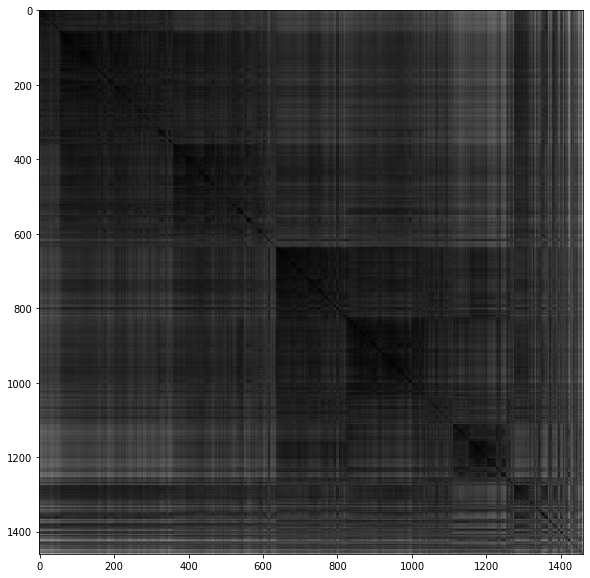

In [4]:
X_scale=sklearn.preprocessing.scale(datos_cluster)
pyclustertend.vat(X_scale)


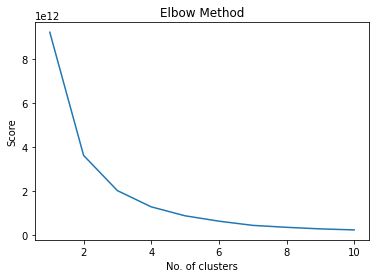

In [5]:
numeroClusters = range(1,11)
wcss = []
for i in numeroClusters:
    kmeans = cluster.KMeans(n_clusters=i)
    kmeans.fit(datos_cluster)
    wcss.append(kmeans.inertia_)

plt.plot(numeroClusters, wcss)
plt.xlabel("No. of clusters")
plt.ylabel("Score")
plt.title("Elbow Method")
plt.show()

Con el metodo del codo podemos observar que k es el optimo para el numero de clusters. En la grafica se observa la variacion en funcion del numero de clusters posibles, de esta forma podemos observar que el k optimo para este caso es 3. 

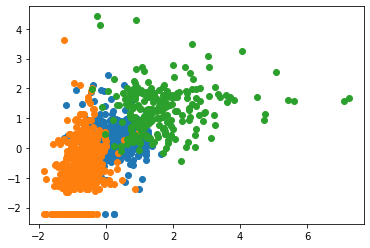

In [6]:
X_scale=sklearn.preprocessing.scale(datos_cluster)
kmeans_result = KMeans(n_clusters=3).fit_predict(X_scale)
kmeans_clusters = np.unique(kmeans_result)
for kmeans_cluster in kmeans_clusters:
    # get data points that fall in this cluster
    index = np.where(kmeans_result == kmeans_cluster)
    # make the plot
    plt.scatter(X_scale[index, 0], X_scale[index, 1], )
plt.show()

Utilizando el algoritmo Kmeans para hacer clustering, se hacen 3 grupos (3 debido al metodo del codo).

Se crea una funcion para clasificar las casas en caras, intermedias o economicas segun los datos obtenidos mas arriba, siendo el precio minimo, el percentil 50 y el percentil 75

In [7]:
def clasificacion_casas(precio):
    if (precio >= 34900 and precio<163000):
        return "Economica"
    elif (precio>= 163000 and precio<214000):
        return "Intermedia"
    else:
        return "Cara"

In [8]:
datos_cluster['clasificacion'] =  datos_cluster.apply(lambda row : clasificacion_casas(row['SalePrice']), axis = 1)

Se puede observar la nueva variable de clasificacion que clasifica las casas segun su precio con la funcion indicada arriba

In [31]:
datos_cluster

,SalePrice,GarageArea,GarageCars,TotRmsAbvGrd,FullBath,GrLivArea,1stFlrSF,TotalBsmtSF,YearBuilt,OverallQual,clasificacion
0,208500,548,2,8,2,1710,856,856,2003,7,Intermedia
1,181500,460,2,6,2,1262,1262,1262,1976,6,Intermedia
2,223500,608,2,6,2,1786,920,920,2001,7,Cara
3,140000,642,3,7,1,1717,961,756,1915,7,Economica
4,250000,836,3,9,2,2198,1145,1145,2000,8,Cara
...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,460,2,7,2,1647,953,953,1999,6,Intermedia
1456,210000,500,2,7,2,2073,2073,1542,1978,6,Intermedia
1457,266500,252,1,9,2,2340,1188,1152,1941,7,Cara
1458,142125,240,1,5,1,1078,1078,1078,1950,5,Economica


Por ultimo se obtiene la variable respuesta del dataframe

In [9]:
y = datos_cluster.pop("clasificacion") #La variable respuesta
X = datos_cluster #El resto de los datos

## Conjuntos de entrenamiento y prueba

*Árbol de clasificación utilizando el conjunto de entrenamiento*

In [10]:
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7)


In [11]:
arbol = DecisionTreeClassifier(max_depth=4, random_state=42) 
arbol = arbol.fit(X_train, y_train) 

[Text(133.92000000000002, 181.2, 'Id <= 162950.0\ngini = 0.617\nsamples = 1021\nvalue = [251, 526, 244]\nclass = 1'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 526\nvalue = [0, 526, 0]\nclass = 1'),
 Text(200.88000000000002, 108.72, 'Id <= 213625.0\ngini = 0.5\nsamples = 495\nvalue = [251, 0, 244]\nclass = 0'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 244\nvalue = [0, 0, 244]\nclass = 2'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.0\nsamples = 251\nvalue = [251, 0, 0]\nclass = 0')]

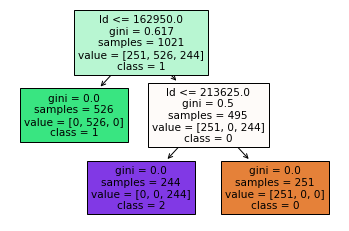

In [12]:
tree.plot_tree(arbol,feature_names=datos.columns,
               class_names=['0','1','2'],filled=True )

In [13]:
X_test

,SalePrice,GarageArea,GarageCars,TotRmsAbvGrd,FullBath,GrLivArea,1stFlrSF,TotalBsmtSF,YearBuilt,OverallQual
265,175500,576,2,7,2,1422,1422,1422,1981,6
55,180500,576,2,7,2,1425,1425,1425,1964,6
1439,197000,550,2,6,2,1725,1040,539,1979,7
880,157000,450,2,5,1,1090,1090,1090,2005,5
160,162500,516,2,6,2,1232,1232,1232,1984,6
...,...,...,...,...,...,...,...,...,...,...
660,197900,550,2,7,2,1935,1142,793,1976,7
669,137500,252,1,5,1,1180,1180,700,1922,4
1135,102000,180,1,5,1,986,986,960,1926,6
282,207500,626,2,6,2,1314,1314,1314,2007,7


In [14]:
y_pred = arbol.predict(X_test)
print(y_pred)
print ("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print ("Precision:", metrics.precision_score(y_test,y_pred,average='weighted') )
print ("Recall: ", metrics.recall_score(y_test,y_pred,average='weighted'))


['Intermedia' 'Intermedia' 'Intermedia' 'Economica' 'Economica'
 'Economica' 'Economica' 'Economica' 'Economica' 'Intermedia' 'Economica'
 'Cara' 'Economica' 'Intermedia' 'Cara' 'Intermedia' 'Economica'
 'Economica' 'Economica' 'Economica' 'Intermedia' 'Economica' 'Cara'
 'Economica' 'Intermedia' 'Intermedia' 'Cara' 'Economica' 'Economica'
 'Cara' 'Economica' 'Economica' 'Intermedia' 'Economica' 'Economica'
 'Intermedia' 'Intermedia' 'Economica' 'Intermedia' 'Intermedia'
 'Economica' 'Economica' 'Economica' 'Intermedia' 'Cara' 'Economica'
 'Cara' 'Economica' 'Intermedia' 'Economica' 'Economica' 'Intermedia'
 'Cara' 'Intermedia' 'Economica' 'Economica' 'Intermedia' 'Intermedia'
 'Intermedia' 'Intermedia' 'Cara' 'Intermedia' 'Economica' 'Economica'
 'Intermedia' 'Economica' 'Intermedia' 'Economica' 'Economica' 'Economica'
 'Cara' 'Economica' 'Economica' 'Economica' 'Intermedia' 'Intermedia'
 'Cara' 'Economica' 'Cara' 'Intermedia' 'Economica' 'Cara' 'Cara' 'Cara'
 'Cara' 'Economica' 'Inte

*Árbol de regresión para predecir el precio de las viviendas usando el conjunto de entrenamiento*

In [15]:
encoder = ce.OneHotEncoder(use_cat_names=True)
y_train2 = encoder.fit_transform(y_train)
y_test2 = encoder.fit_transform(y_test)
regrassor = DecisionTreeRegressor(random_state=0)
regrassor = regrassor.fit(X_train, y_train2)

[Text(133.92000000000002, 181.2, 'Id <= 162950.0\nmse = 0.206\nsamples = 1021\nvalue = [[0.515]\n[0.239]\n[0.246]]'),
 Text(66.96000000000001, 108.72, 'mse = 0.0\nsamples = 526\nvalue = [[1.0]\n[0.0]\n[0.0]]'),
 Text(200.88000000000002, 108.72, 'Id <= 213625.0\nmse = 0.167\nsamples = 495\nvalue = [[0.0]\n[0.493]\n[0.507]]'),
 Text(133.92000000000002, 36.23999999999998, 'mse = 0.0\nsamples = 244\nvalue = [[0.0]\n[1.0]\n[0.0]]'),
 Text(267.84000000000003, 36.23999999999998, 'mse = 0.0\nsamples = 251\nvalue = [[0.0]\n[0.0]\n[1.0]]')]

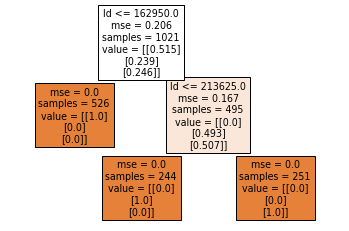

In [16]:
tree.plot_tree(regrassor,feature_names=datos.columns,
               class_names=['0','1','2'],filled=True )

In [17]:
y_pred = regrassor.predict(X_test)
print(y_pred)
print ("Accuracy:",metrics.accuracy_score(y_test2, y_pred))
print ("Precision:", metrics.precision_score(y_test2,y_pred,average='weighted') )
print ("Recall: ", metrics.recall_score(y_test2,y_pred,average='weighted'))

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]
Accuracy: 0.2648401826484018
Precision: 0.2648401826484018
Recall:  0.2648401826484018


## Modelo con el conjunto de prueba

In [18]:
# Import required libraries and modules
import matplotlib.pyplot as plt
from sklearn.cluster import Birch

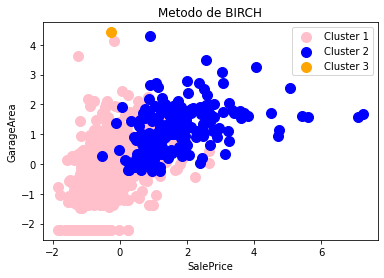

In [19]:
# Create a Birch object
model = Birch(n_clusters = 3, threshold = 1.5)
model.fit(X_scale)

# Get cluster labels
resultModel = model.predict(X_scale)

# Graficar los clusters
plt.scatter(X_scale[resultModel==0,0], X_scale[resultModel==0,1], s=100, c='pink', label='Cluster 1')
plt.scatter(X_scale[resultModel==1,0], X_scale[resultModel==1,1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_scale[resultModel==2,0], X_scale[resultModel==2,1], s=100, c='orange',  label='Cluster 3')  
plt.xlabel(datos_cluster.columns[0])
plt.ylabel(datos_cluster.columns[1])
plt.legend()
plt.title("Metodo de BIRCH")
plt.show()

BIRCH proporciona un método de agrupamiento para conjuntos de datos muy grandes. Este se concentra en regiones densamente ocupadas y ayuda a crear un resumen compacto. Con este modelo podemos ayudar a predecir la variable respuesta con relación a la información que se va obteniendo o cambiando a futuro.

In [20]:
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.cluster import KMeans

#para este caso nos apoyamos de la pagina
#https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

For n_clusters = 2 The average silhouette_score is: 0.31844517136682554
For n_clusters = 3 The average silhouette_score is: 0.2632886313279674


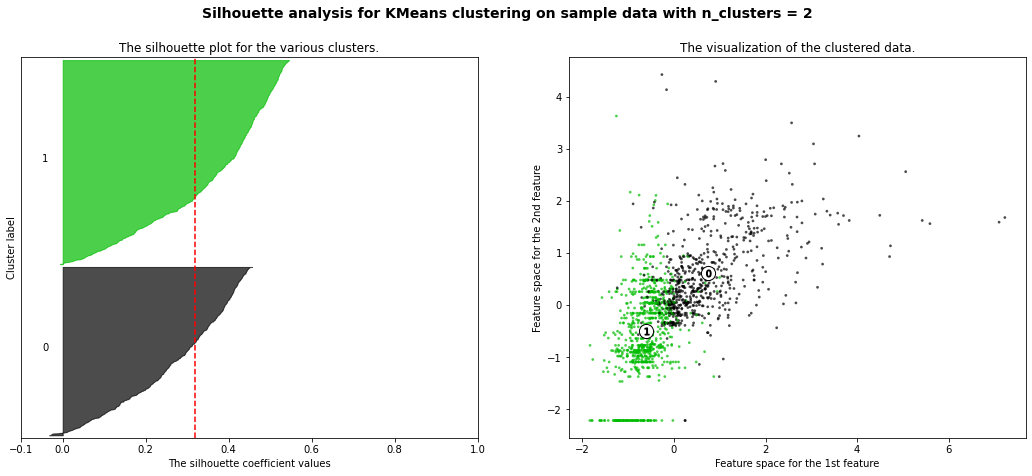

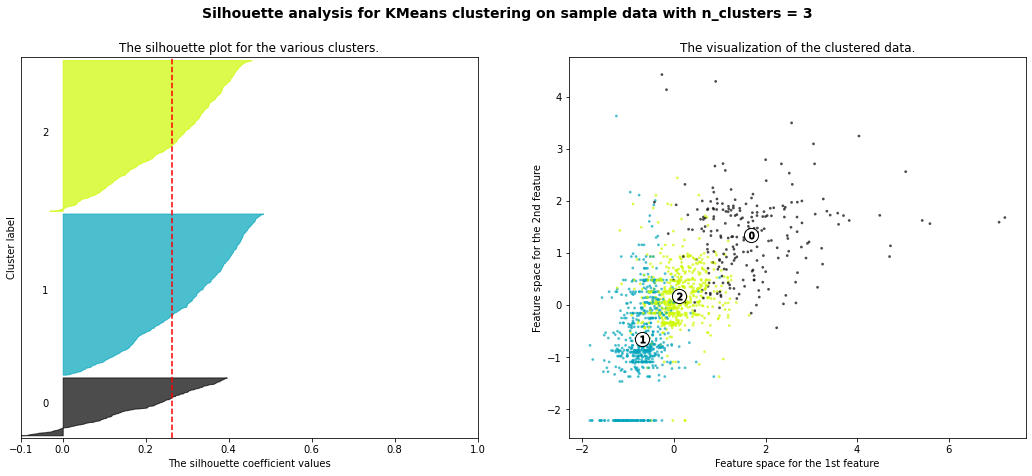

In [21]:
# Generate the sample data
range_n_clusters = [2, 3]

# Create a subplot with 1 row and 2 columns
for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X_scale) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_scale)

    silhouette_avg = silhouette_score(X_scale, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is:",
        silhouette_avg
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_scale, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X_scale[:, 0], X_scale[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    # For the sake of this example, we only use two clusters
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

La técnica Silhoutette proporciona una representación gráfica sucinta de qué tan bien se ha clasificado cada objeto. En este caso, podemos observar que la primera gráfica tiene una mejor proporción de datos, en este caso el cluster 1 es más significativo. A comparación con el cluster 3, este tiene un average menor que los demás, por lo tanto la información que nos proporciona este cluster no es tan significativa.

## Análisis de la eficiencia del algoritmo usando una matriz de confusión para el árbol de clasificación. 

### *Árbol de clasificación*

In [22]:
# columna con las variables cuantitativas
cuanti = ['MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2',
    'BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
    'BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch',
    '3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold','SalePrice']
datosCuantitativos = datos[cuanti]
datosCuantitativos


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


In [23]:
trial = datos[cuanti]
trial = trial.dropna()
y = trial.pop('SalePrice')
cuanti.remove('SalePrice')
x = trial[cuanti]

random.seed(579)

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [26]:
treeClass = DecisionTreeClassifier(max_depth=4, random_state=42)
treeClass = treeClass.fit(x_train, y_train)

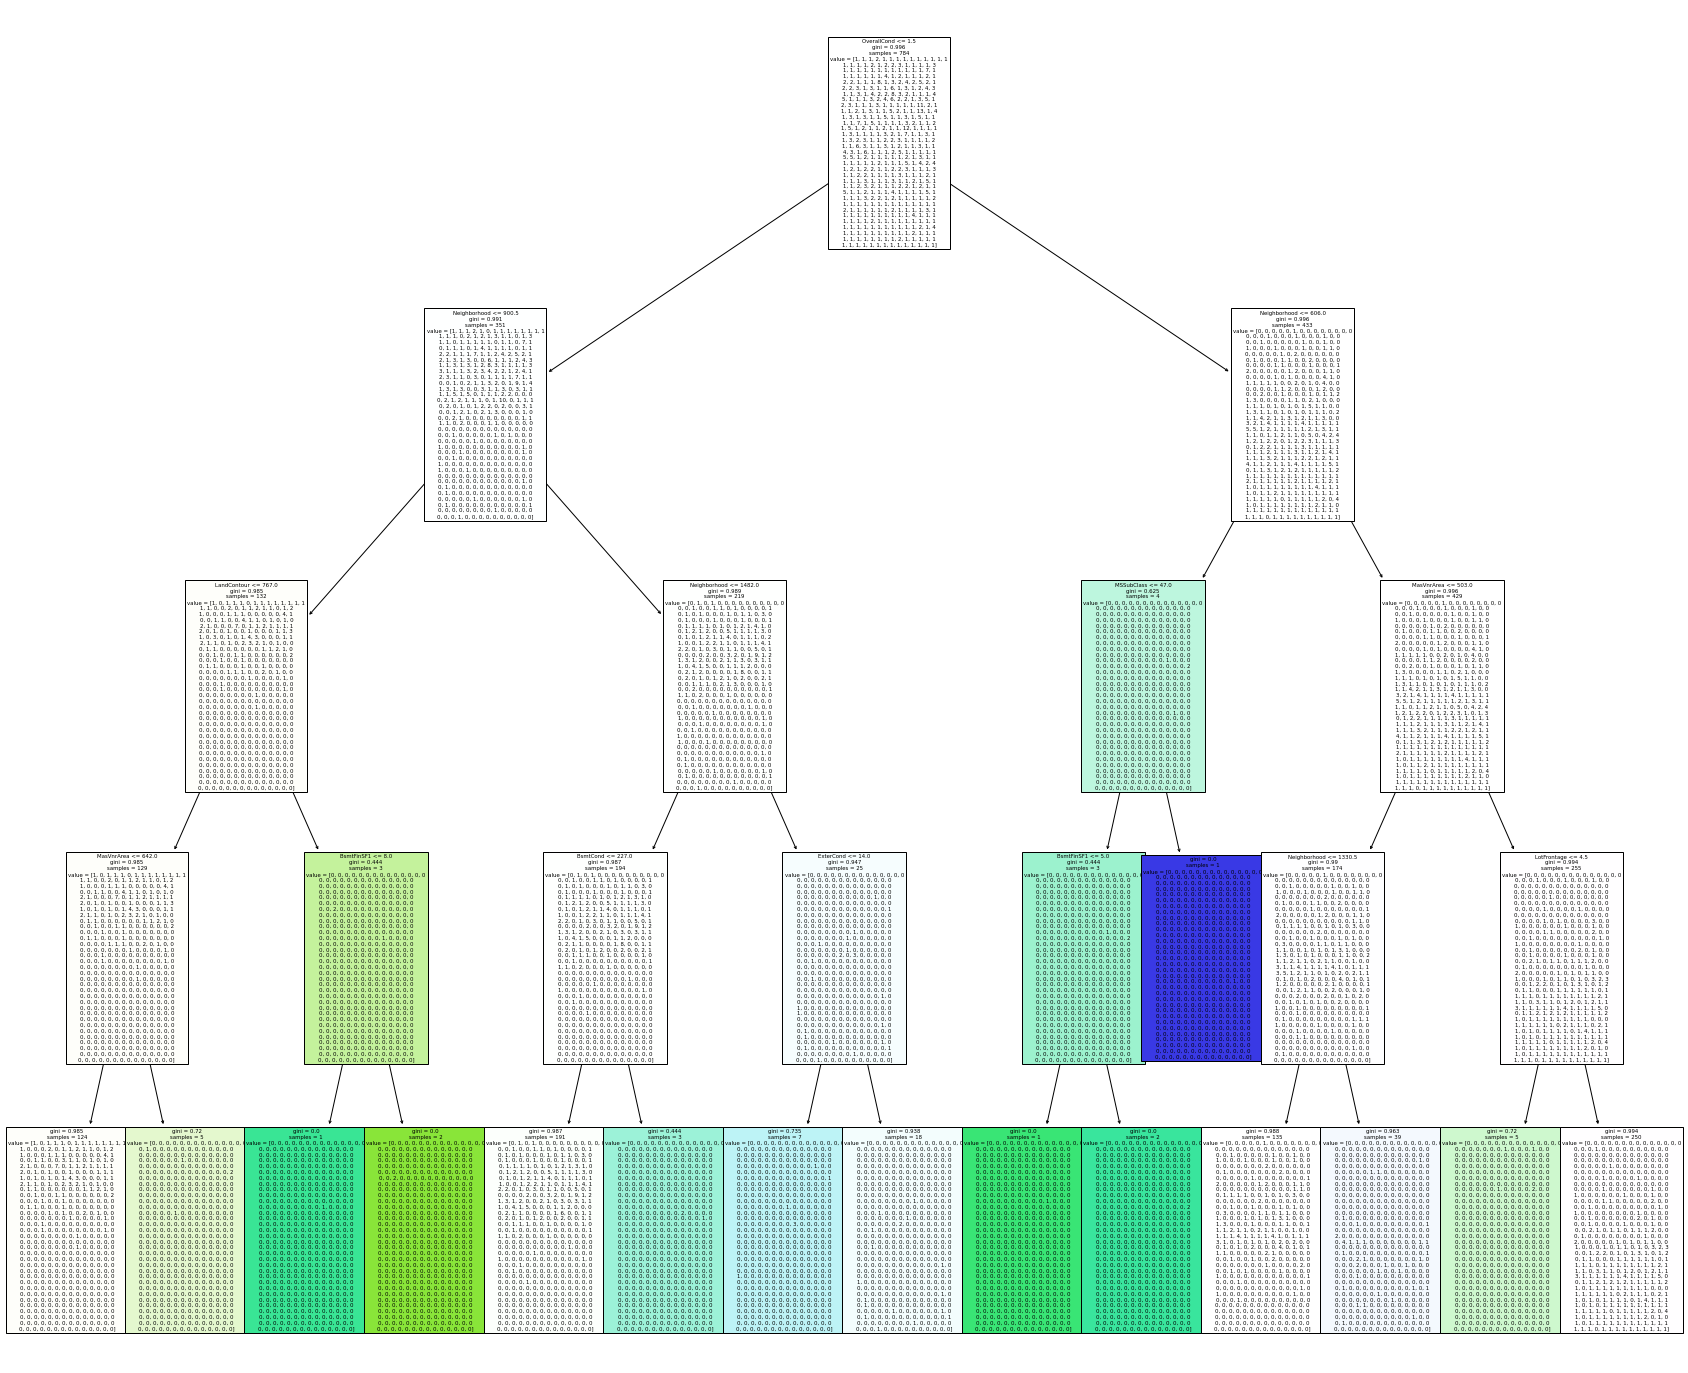

In [42]:
fig1 = plt.figure(figsize=(30,25))
tree.plot_tree(treeClass, feature_names=datos.columns, filled=True)
fig1.savefig('treeClassification.png')

In [28]:
y_pred = treeClass.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall:", metrics.recall_score(y_test, y_pred, average='weighted'))

Accuracy: 0.011869436201780416
Precision: 0.0007065140596297866
Recall: 0.011869436201780416


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### *Árbol de regresión*

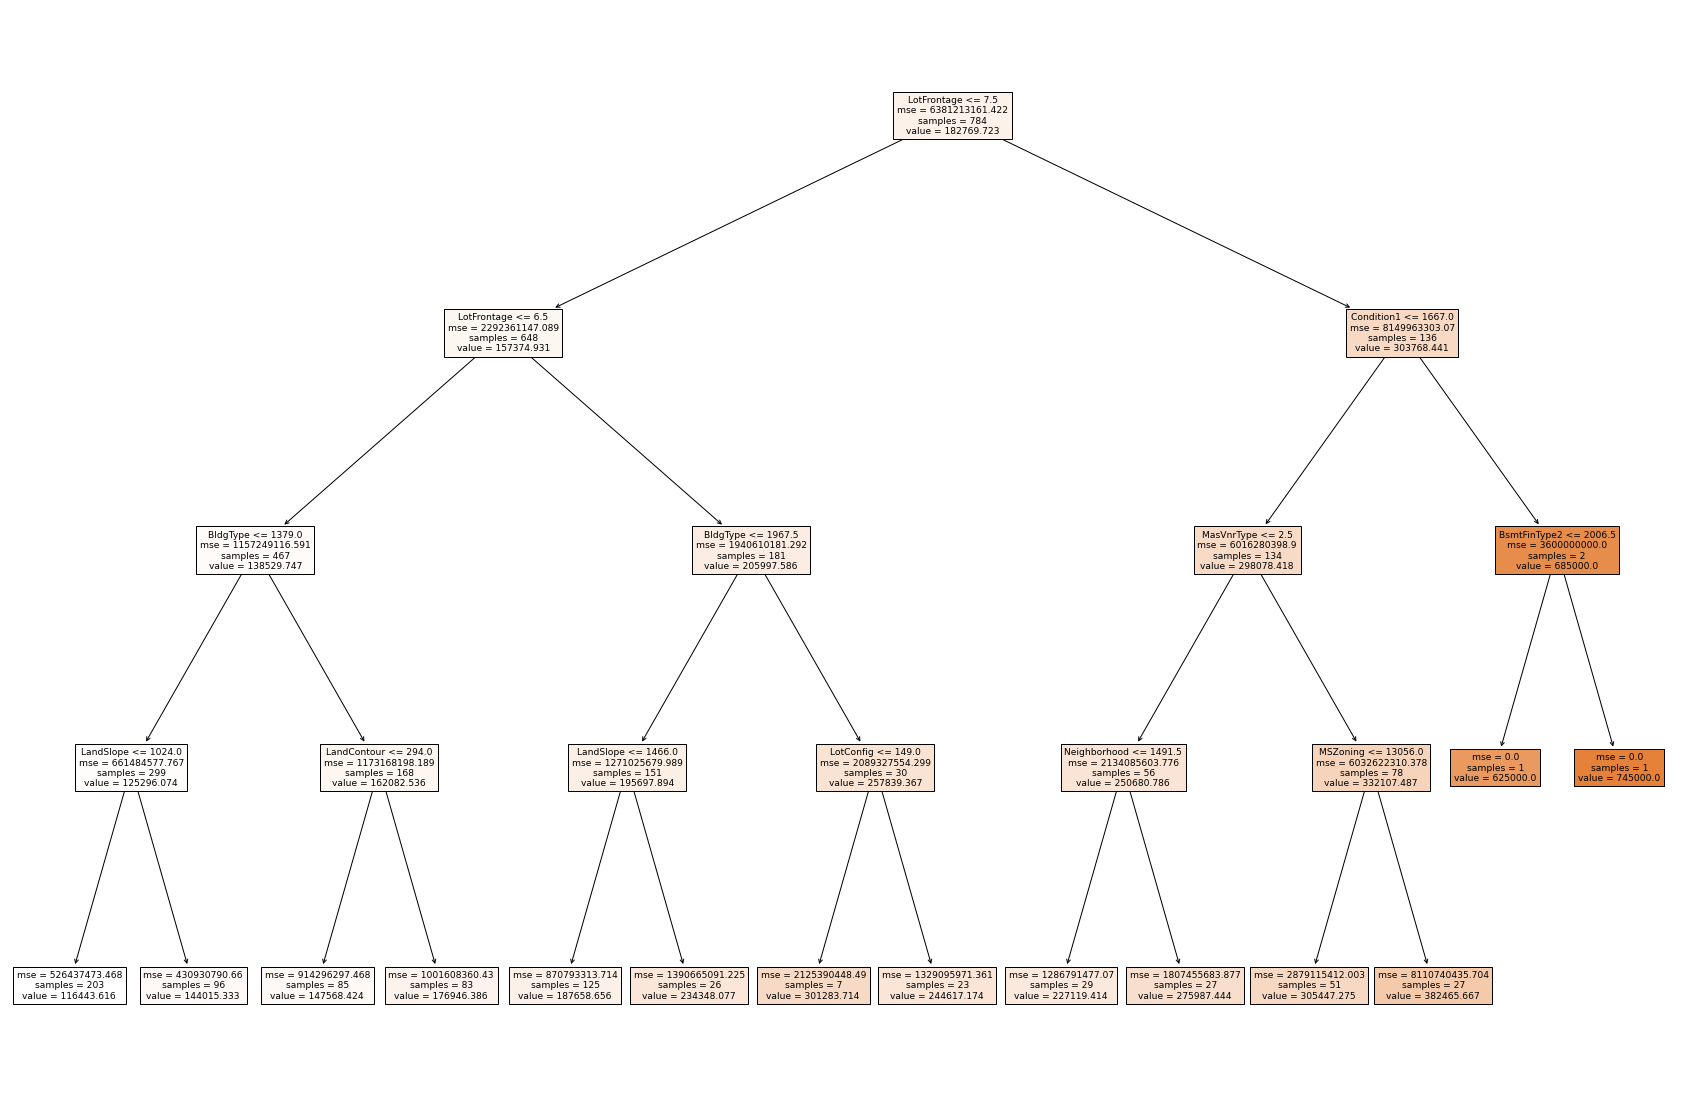

In [41]:
fig2 = plt.figure(figsize=(30, 20))
regressionTree = DecisionTreeRegressor(max_depth=4, random_state=42) 
regressionTree = regressionTree.fit(x_train, y_train) 
tree.plot_tree(regressionTree, feature_names=datos.columns, filled=True)
fig2.savefig('treeRegression.png')

### *Matriz de confusión para verificar el árbol de clasificación*

In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
print("Matriz de confusion", confusion_matrix(y_test, y_pred))
print("Acuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall:", metrics.recall_score(y_test, y_pred, average='weighted'))


Matriz de confusion [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Acuracy: 0.011869436201780416
Precision: 0.0007065140596297866
Recall: 0.011869436201780416


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Desempeño del árbol de regresión

In [65]:
y_pred_t = regressionTree.predict(x_train)
print("Error cuadrático medio con el conjunto entrenado: ", metrics.mean_squared_error(y_train, y_pred_t, squared=True))
y_pred = regressionTree.predict(x_test)
print("Error cuadrático medio con el conjunto de prueba: ", metrics.mean_squared_error(y_test, y_pred, squared=True))

Error cuadrático medio con el conjunto entrenado:  1213624200.714826
Error cuadrático medio con el conjunto de prueba:  1793746820.3168855


Para comprender el desempeño que tiene el árbol de regresión hicimos uso del MSE comparándolo entre la información entrenada y la información de prueba. Sin embargo, al tratar de comparar los resultados obtenidos con el árbol de clasificación podemos observar que este puede ser menos significativo. El algoritmo para el árbol de regresión se vuelve más preciso y confiable. 

## Random forest para analizar los algoritmos

In [45]:
randomForest = RandomForestClassifier(max_depth=4, random_state=42) 
randomForest = randomForest.fit(X_train, y_train) 

In [18]:
y_pred=randomForest.predict(X_test)
print(y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

['Intermedia' 'Cara' 'Economica' 'Economica' 'Cara' 'Intermedia'
 'Intermedia' 'Cara' 'Intermedia' 'Intermedia' 'Economica' 'Economica'
 'Cara' 'Economica' 'Economica' 'Intermedia' 'Cara' 'Cara' 'Cara' 'Cara'
 'Cara' 'Intermedia' 'Economica' 'Intermedia' 'Economica' 'Economica'
 'Economica' 'Economica' 'Economica' 'Economica' 'Economica' 'Cara'
 'Economica' 'Economica' 'Intermedia' 'Economica' 'Economica' 'Intermedia'
 'Economica' 'Cara' 'Intermedia' 'Economica' 'Intermedia' 'Economica'
 'Economica' 'Intermedia' 'Intermedia' 'Economica' 'Cara' 'Economica'
 'Economica' 'Economica' 'Economica' 'Intermedia' 'Economica' 'Economica'
 'Intermedia' 'Intermedia' 'Intermedia' 'Economica' 'Economica'
 'Economica' 'Economica' 'Intermedia' 'Economica' 'Economica' 'Economica'
 'Economica' 'Economica' 'Economica' 'Economica' 'Economica' 'Intermedia'
 'Cara' 'Economica' 'Intermedia' 'Intermedia' 'Economica' 'Economica'
 'Intermedia' 'Cara' 'Cara' 'Intermedia' 'Economica' 'Economica'
 'Economica' 'Car

In [27]:
feature_imp = pd.Series(randomForest.feature_importances_,index=datos_cluster.columns).sort_values(ascending=False)
feature_imp

SalePrice       0.577820
OverallQual     0.144848
GrLivArea       0.077201
FullBath        0.065882
YearBuilt       0.046810
TotalBsmtSF     0.028150
GarageCars      0.018566
1stFlrSF        0.018565
GarageArea      0.016032
TotRmsAbvGrd    0.006126
dtype: float64

No handles with labels found to put in legend.


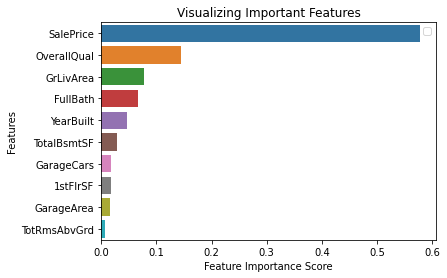

In [29]:
sb.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()